In [ ]:
# https://nlu.johnsnowlabs.com/docs/en/install
# ! pip install nlu pyspark==3.0.1
! pip install nlu pyspark==3.0.1

import nlu

nlu.load('emotion').predict('wow that was easy')

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

max_rows = 10000

# from movie set code
df = pd.read_csv(
    "movie_lines.tsv", 
    encoding='utf-8-sig', 
    sep='\t', 
    error_bad_lines=True, 
    header = None,
    names = ['lineID', 'charID', 'movieID', 'charName', 'text'],
    index_col=['lineID']
)

df = df.iloc[0:max_rows,:]
df = df.rename(columns={"text":"Title"})


hints = ['I want to get something Taiwanese to eat at Din Tai Fung', 
         'Wanna grab a strong blend coffee at Starbucks?',
         'Stay within limits today',
         'I love extremes only',
         'So tired and sleepy',
         'Let\'s watch a movie and entertain ourselves',
         'I want to keep watching the movie',
         'I want some caffeine in my blood',
         'Be adventurous and proceed into the cockpit',
         'Go and take rest at your seat',
         'Help the captain',
         'Help the deputy take power from the captain',
         'Get help to save everyone',
         'None of your business'
         ]

for i in range(len(hints)):
  df.loc[len(df.index)] = [f'u{i*5+1}', f'm{i+1}', 'KUNAL', hints[i]]
# df.loc[len(df.index)] = ['u66', 'm5', 'KUNAL','I want to get something Taiwanese to eat at Din Tai Fung'] 
# df.loc[len(df.index)] = ['u67', 'm5', 'CALVIN','Wanna grab a strong blend coffee at Starbucks?'] 
# df.loc[len(df.index)] = ['u31', 'm6', 'MCKINLEY','Stay within limits today']
# df.loc[len(df.index)] = ['u622', 'm6', 'CALVIN','I love extremes only']  
# df.loc[len(df.index)] = ['u21', 'm13', 'SEBASTIAN','So tired and sleepy'] 
# df.loc[len(df.index)] = ['u25', 'm12', 'FAITH','Let\'s watch a movie and entertain ourselves'] 
# df.loc[len(df.index)] = ['u46', 'm10', 'PHIL','I want to keep watching the movie'] 
# df.loc[len(df.index)] = ['u21', 'm13', 'SAM','I want some caffeine in my blood'] 
# df.loc[len(df.index)] = ['u41', 'm16', 'JOEY','Be adventurous and proceed into the cockpit'] 
# df.loc[len(df.index)] = ['u43', 'm56', 'JOHN','Go and take rest at your seat'] 
# df.loc[len(df.index)] = ['u46', 'm15', 'TOM','Help the captain'] 
# df.loc[len(df.index)] = ['u48', 'm11', 'CARLOS','Help the deputy take power from the captain'] 
# df.loc[len(df.index)] = ['u84', 'm63', 'KATE','Get help to save everyone'] 
# df.loc[len(df.index)] = ['u86', 'm65', 'CHANG','None of your business'] 
df

ModuleNotFoundError: ignored

In [18]:
import nlu
pipe = nlu.load('embed_sentence.bert')
predictions = pipe.predict(df.Title, output_level='document')
predictions

sent_small_bert_L2_128 download started this may take some time.
Approximate size to download 16.1 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


,document,text,sentence_embedding_bert
0,They do not!,They do not!,"[-1.64044189453125, 0.14650537073612213, -0.86..."
1,They do to!,They do to!,"[-1.5560803413391113, 0.22445619106292725, -0...."
2,I hope so.,I hope so.,"[-1.458977222442627, 0.5383047461509705, -0.94..."
3,She okay?,She okay?,"[-1.8440120220184326, 0.07303400337696075, -1...."
4,Let's go.,Let's go.,"[-1.6448785066604614, 0.5133222341537476, -0.9..."
...,...,...,...
995,What are you doing?,What are you doing?,"[-1.2078465223312378, 0.3052385747432709, -0.4..."
996,I'll get my clothes.,I'll get my clothes.,"[-1.2929704189300537, 1.1421815156936646, -0.9..."
997,I'll make some for us.,I'll make some for us.,"[-1.3391683101654053, 0.6000733375549316, -0.4..."
998,In the kitchen.,In the kitchen.,"[-2.030850648880005, 0.591679573059082, -0.985..."


In [19]:
# ## Calculate distance between all pairs of sentences in DF 
# e_col = 'sentence_embedding_bert'

# def get_sim_df_for_iloc(sent_iloc, predictions=predictions,e_col=e_col, pipe=pipe):
#   # This function calculatse the distances for one sentences at  predictions[sent_iloc] to all other sentences in predictions using the embedding defined by e_col 
#   # put embeddings in matrix
#   embed_mat = np.array([x for x in predictions[e_col]])
#   # calculate distance between every embedding pair
#   sim_mat = cosine_similarity(embed_mat,embed_mat)
#   print("Similarities for Sentence : " + df.iloc[sent_iloc].Title)
#   # write sim scores to df
#   df['sim_score'] = sim_mat[sent_iloc]
#   return df 

# sentence_to_compare=33
# sim_df_for_one_sent = get_sim_df_for_iloc(sentence_to_compare,predictions,e_col)
# sim_df_for_one_sent.sort_values('sim_score', ascending = False)

Similarities for Sentence : So that's the kind of guy she likes? Pretty ones?


,charID,movieID,charName,Title,sim_score
lineID,,,,,
L406,u2,m0,CAMERON,So that's the kind of guy she likes? Pretty ones?,1.000000
L584,u2,m0,CAMERON,The hell is that? What kind of 'guy just pick...,0.919059
L377,u9,m0,PATRICK,What is it with this chick? She have three tits?,0.915023
L881,u11,m0,WALTER,It's that hot rod Joey right? That ' s who you...,0.902581
L198,u0,m0,BIANCA,You're asking me out. That's so cute. What's ...,0.898182
...,...,...,...,...,...
"L565\tu5\tm0\tKAT\t""I'm getting trashed man."" Isn't that what you're supposed to do at a party?",NaN,NaN,NaN,NaN,0.477482
"L860\tu0\tm0\tBIANCA\tThen Guillermo says ""If you go any lighter you're gonna look like an extra on 90210.""",NaN,NaN,NaN,NaN,0.477482
"L2081\tu16\tm1\tCOLUMBUS\tI know what I see. I see someone who doesn't accept the world as it is. Who's not afraid. I see a women who thinks... ""What if?""...",NaN,NaN,NaN,NaN,0.477482


Similarities for Sentence : They do not!


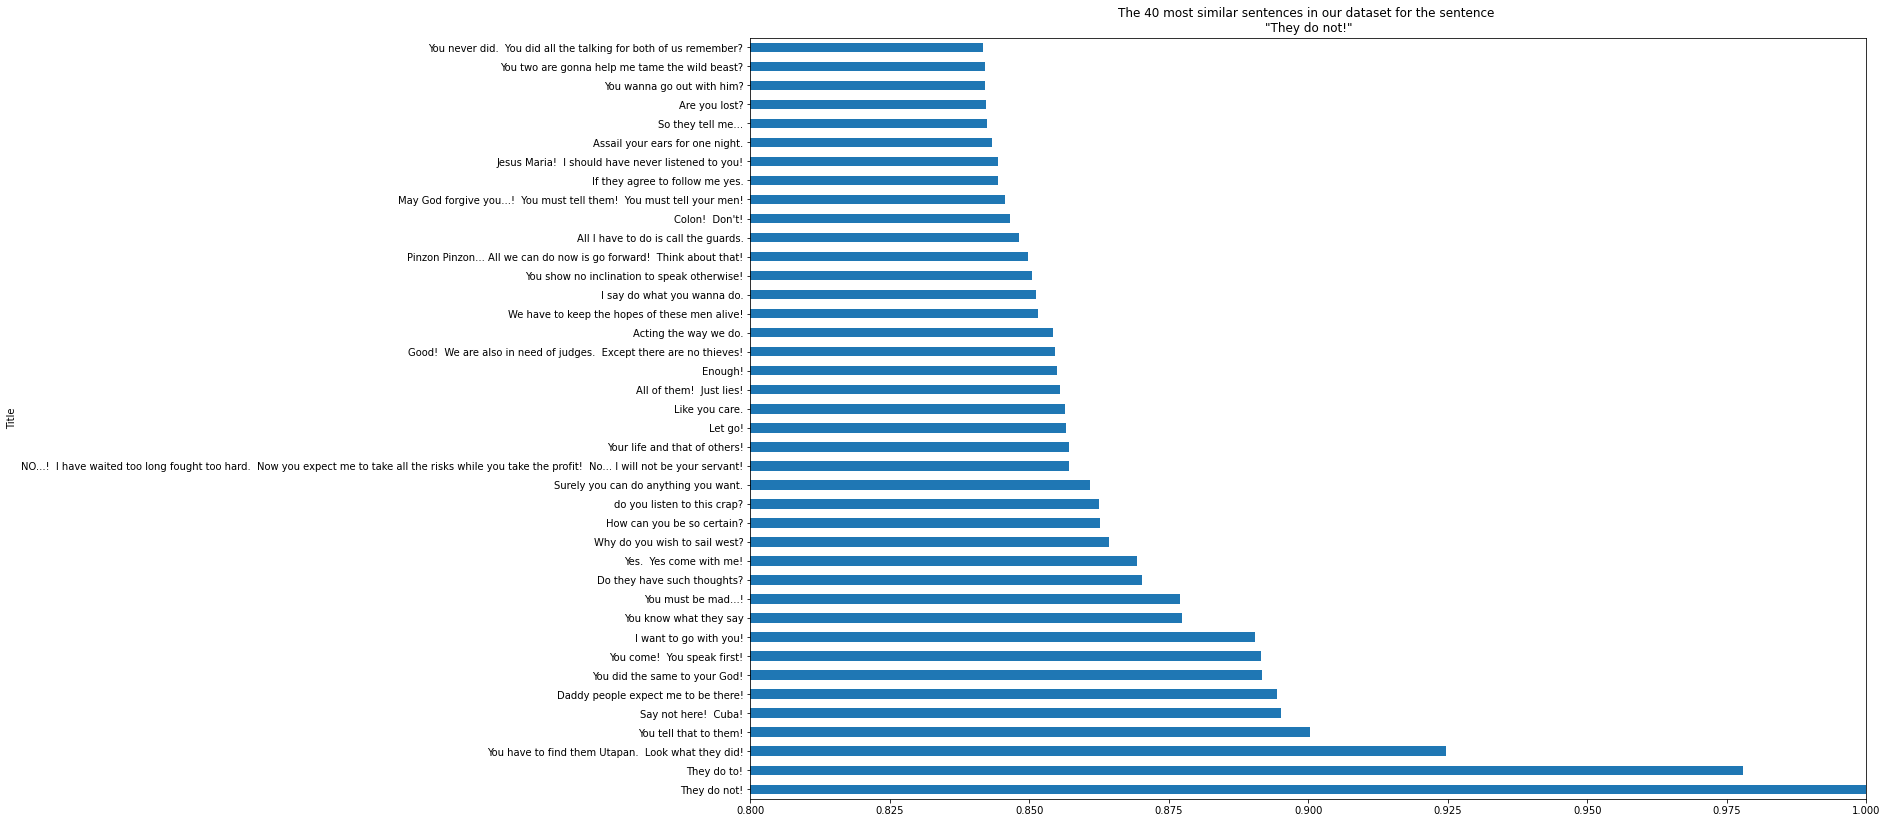

In [20]:
# def viz_sim_df_for_one_sent( sent_iloc=0, N = 40, sim_df_for_one_sent=sim_df_for_one_sent):
#   # Plots the N most similar sentences in our dataframe for sentence at position sent_iloc
#   sim_df_for_one_sent = get_sim_df_for_iloc(sent_iloc)
  
#   sim_df_for_one_sent.index = sim_df_for_one_sent.Title
#   sent = sim_df_for_one_sent.iloc[sent_iloc].Title
#   ax = sim_df_for_one_sent.sort_values('sim_score', ascending = False).iloc[:N].sim_score.plot.barh(title=f'The {N} most similar sentences in our dataset for the sentence \n"{sent}"', figsize=(20,14))
#   ax.set_xlim(0.8, 1)

# # Just put in any number and get the plot for similarities of the sentence at df.iloc[i]
# viz_sim_df_for_one_sent(0)

In [21]:
# def get_sim_df_total( predictions,string_to_embed, e_col=e_col ,pipe=pipe):

#   # This function calculates the distances between every sentence pair. Creates for ever sentence a new column with the name equal to the sentence it comparse to 
#   # put embeddings in matrix
#   embed_mat = np.array([x for x in predictions[e_col]])
#   # calculate distance between every embedding pair
#   sim_mat = cosine_similarity(embed_mat,embed_mat)
#   # for i,v in enumerate(sim_mat): predictions[str(i)+'_sim'] = sim_mat[i]
#   for i,v in enumerate(sim_mat): 
#     s = predictions.iloc[i].document
#     predictions[s] = sim_mat[i]

#   return predictions 

# sim_matrix_df = get_sim_df_total(predictions, string_to_embed='get starbucks' )
# sim_matrix_df

,document,text,sentence_embedding_bert,They do not!,They do to!,I hope so.,She okay?,Let's go.,Wow,Okay -- you're gonna need to learn how to lie.,No,NaN,Like my fear of wearing pastels?,What good stuff?,I figured you'd get to the good stuff eventually.,Thank God! If I had to hear one more story about your coiffure...,Me. This endless ...blonde babble. I'm like boring myself.,What crap?,do you listen to this crap?,No...,You always been this selfish?,But,Then that's all you had to say.,Well no...,You never wanted to go out with 'me did you?,I was?,Tons,Have fun tonight?,I believe we share an art instructor,You know Chastity?,Looks like things worked out tonight huh?,Hi.,Who knows? All I've ever heard her say is that she'd dip before dating a guy that smokes.,So that's the kind of guy she likes? Pretty ones?,Lesbian? No. I found a picture of Jared Leto in one of her drawers so I'm pretty sure she's not harboring same-sex tendencies.,She's not a...,I'm workin' on it. But she doesn't seem to be goin' for him.,I really really really wanna go but I can't. Not unless my sister goes.,Sure have.,Eber's Deep Conditioner every two days. And I never ever use a blowdryer without the diffuser attachment.,...,What else do you need?,This is not about money Emil. I need your trust in me.,Thirty-percent. No more. Or I call another lawyer. This is the biggest case of your life. Don't try to negotiate. Thirty percent. Say yes or no.,But it's...,No. No way.,I would say...half. Half is fair.,What's your cut? How much?,Look I haven't really focused on that kind of thing.,What about my movie rights? Book rights?,Don't worry about him. Think about yourself.,No he is here. Shit...,Disappeared. They're looking everywhere. Maybe he went back to Czechoslovakia.,What about Oleg?,Well you didn't appreciate the severity of it until recently. No question about that.,I was all of these.,...delusions and paranoia.,Oh sure.,You bring the cigarettes?,I brought you some letters. It's really fan mail. Women mostly. One wants to buy you clothes another sent a check. Another wants a check.,I'm invoking rights - this man is represented by counsel. I'm coming with him.,Yes. Yes come with me!,I'm coming with you.,Where are we going?,Don't say anything.,He has the camera! He took the movie!,Emil. Take it easy. Stay with me. Sit down. What do you need? What are you looking for?,Oh no! No! Shit!,Here. I have your money.,I'm not your lawyer until I see the money.,Are you my attorney? I'm Emil. I'm insane.,Daphne I...,I don't want to drag you down with me.,...Do you really want me to forget about you?,Forget about me. You have enough problems of your own.,Pouring it out!,What are you doing?,I'll get my clothes.,I'll make some for us.,In the kitchen.,Do you have coffee?
0,They do not!,They do not!,"[-1.64044189453125, 0.14650537073612213, -0.86...",1.000000,0.977915,0.769251,0.733169,0.761997,0.682297,0.801892,0.706168,0.642658,0.726730,0.773075,0.748829,0.786312,0.691012,0.760734,0.862453,0.730287,0.809975,0.742714,0.800341,0.748042,0.809401,0.706147,0.595523,0.810282,0.711648,0.766064,0.710991,0.701569,0.717986,0.692323,0.653800,0.722123,0.686169,0.776760,0.780182,0.699486,...,0.814765,0.735999,0.726008,0.702996,0.731905,0.753844,0.755280,0.707309,0.717138,0.737269,0.765372,0.748569,0.751634,0.742763,0.768303,0.701708,0.761256,0.813111,0.709520,0.663433,0.869205,0.705957,0.804082,0.754851,0.700114,0.829104,0.795191,0.820595,0.695398,0.686016,0.748703,0.766021,0.813114,0.808749,0.800532,0.805816,0.753439,0.770700,0.628826,0.816634
1,They do to!,They do to!,"[-1.5560803413391113, 0.22445619106292725, -0....",0.977915,1.000000,0.752308,0.719396,0.757408,0.677545,0.789499,0.686995,0.639304,0.709242,0.744793,0.731496,0.782083,0.689140,0.740030,0.851008,0.716525,0.773306,0.712166,0.787090,0.729913,0.790553,0.692476,0.589678,0.794553,0.701026,0.745572,0.690082,0.710949,0.699490,0.657951,0.616158,0.705681,0.644886,0.729447,0.760709,0.685438,...,0.787938,0.720578,0.700106,0.684870,0.

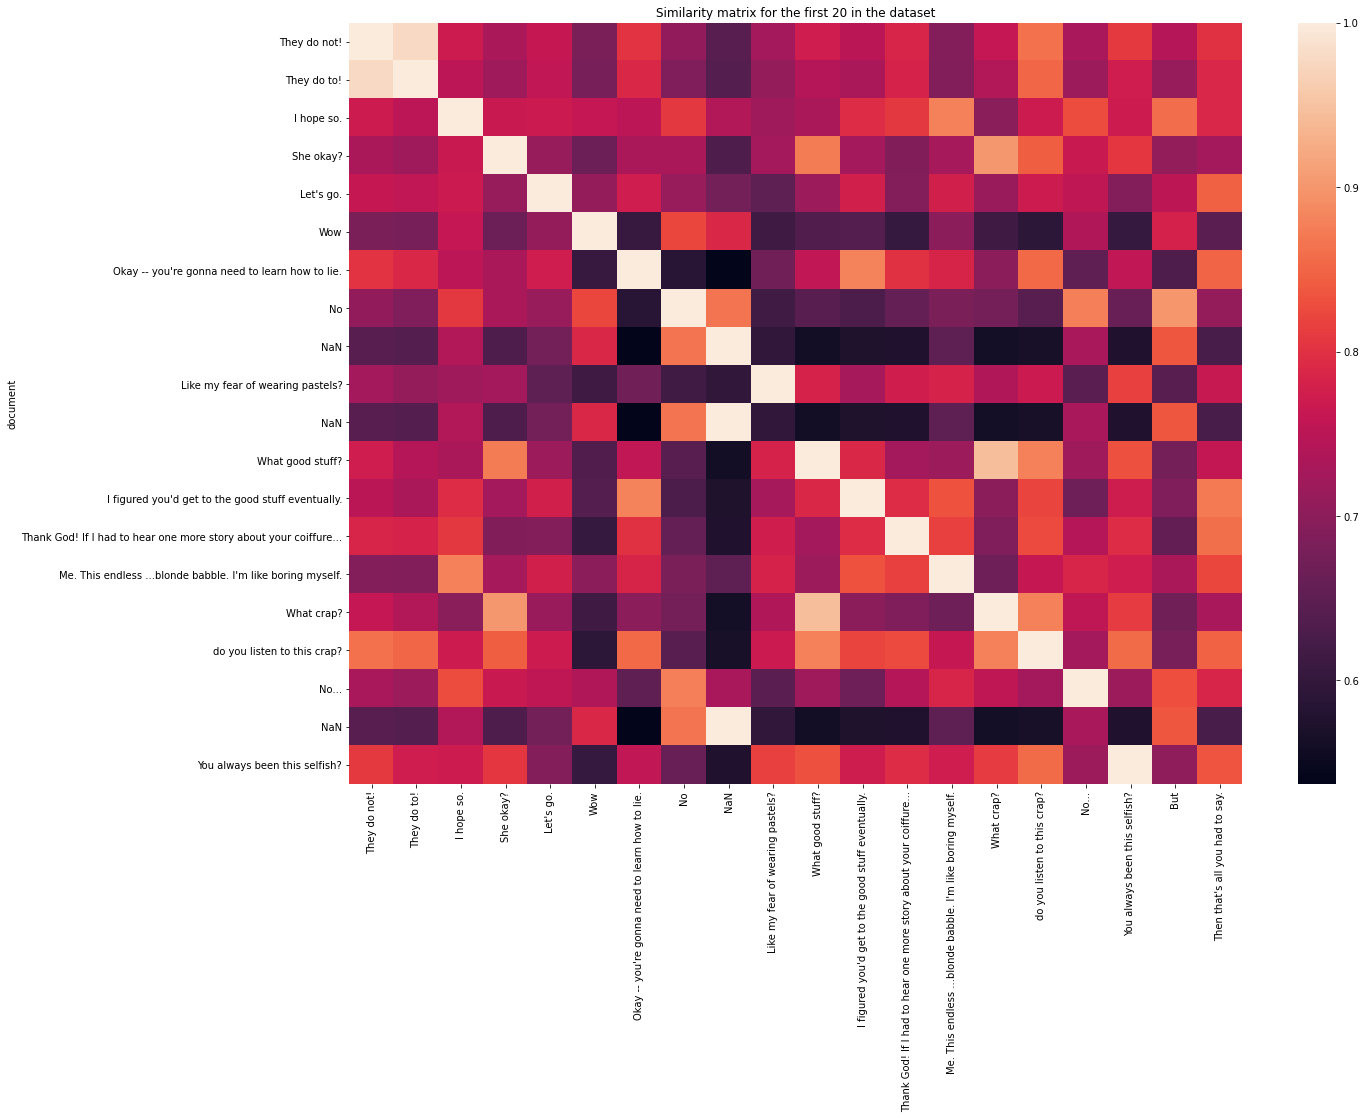

In [24]:
# non_sim_columns  = ['text','document',e_col]

# def viz_sim_matrix_first_n(num_sentences=20, sim_df = sim_matrix_df):
#   # Plot heatmap for the first num_sentences
#   fig, ax = plt.subplots(figsize=(20,14)) 
#   sim_df.index = sim_df.document
#   sim_columns = list(sim_df.columns)
#   for b in non_sim_columns : sim_columns.remove(b)
#   # sim_matrix_df[sim_columns]
#   ax = sns.heatmap(sim_df.iloc[:num_sentences][sim_columns[:num_sentences]]) 

#   ax.axes.set_title(f"Similarity matrix for the first {num_sentences} in the dataset",)

# viz_sim_matrix_first_n()

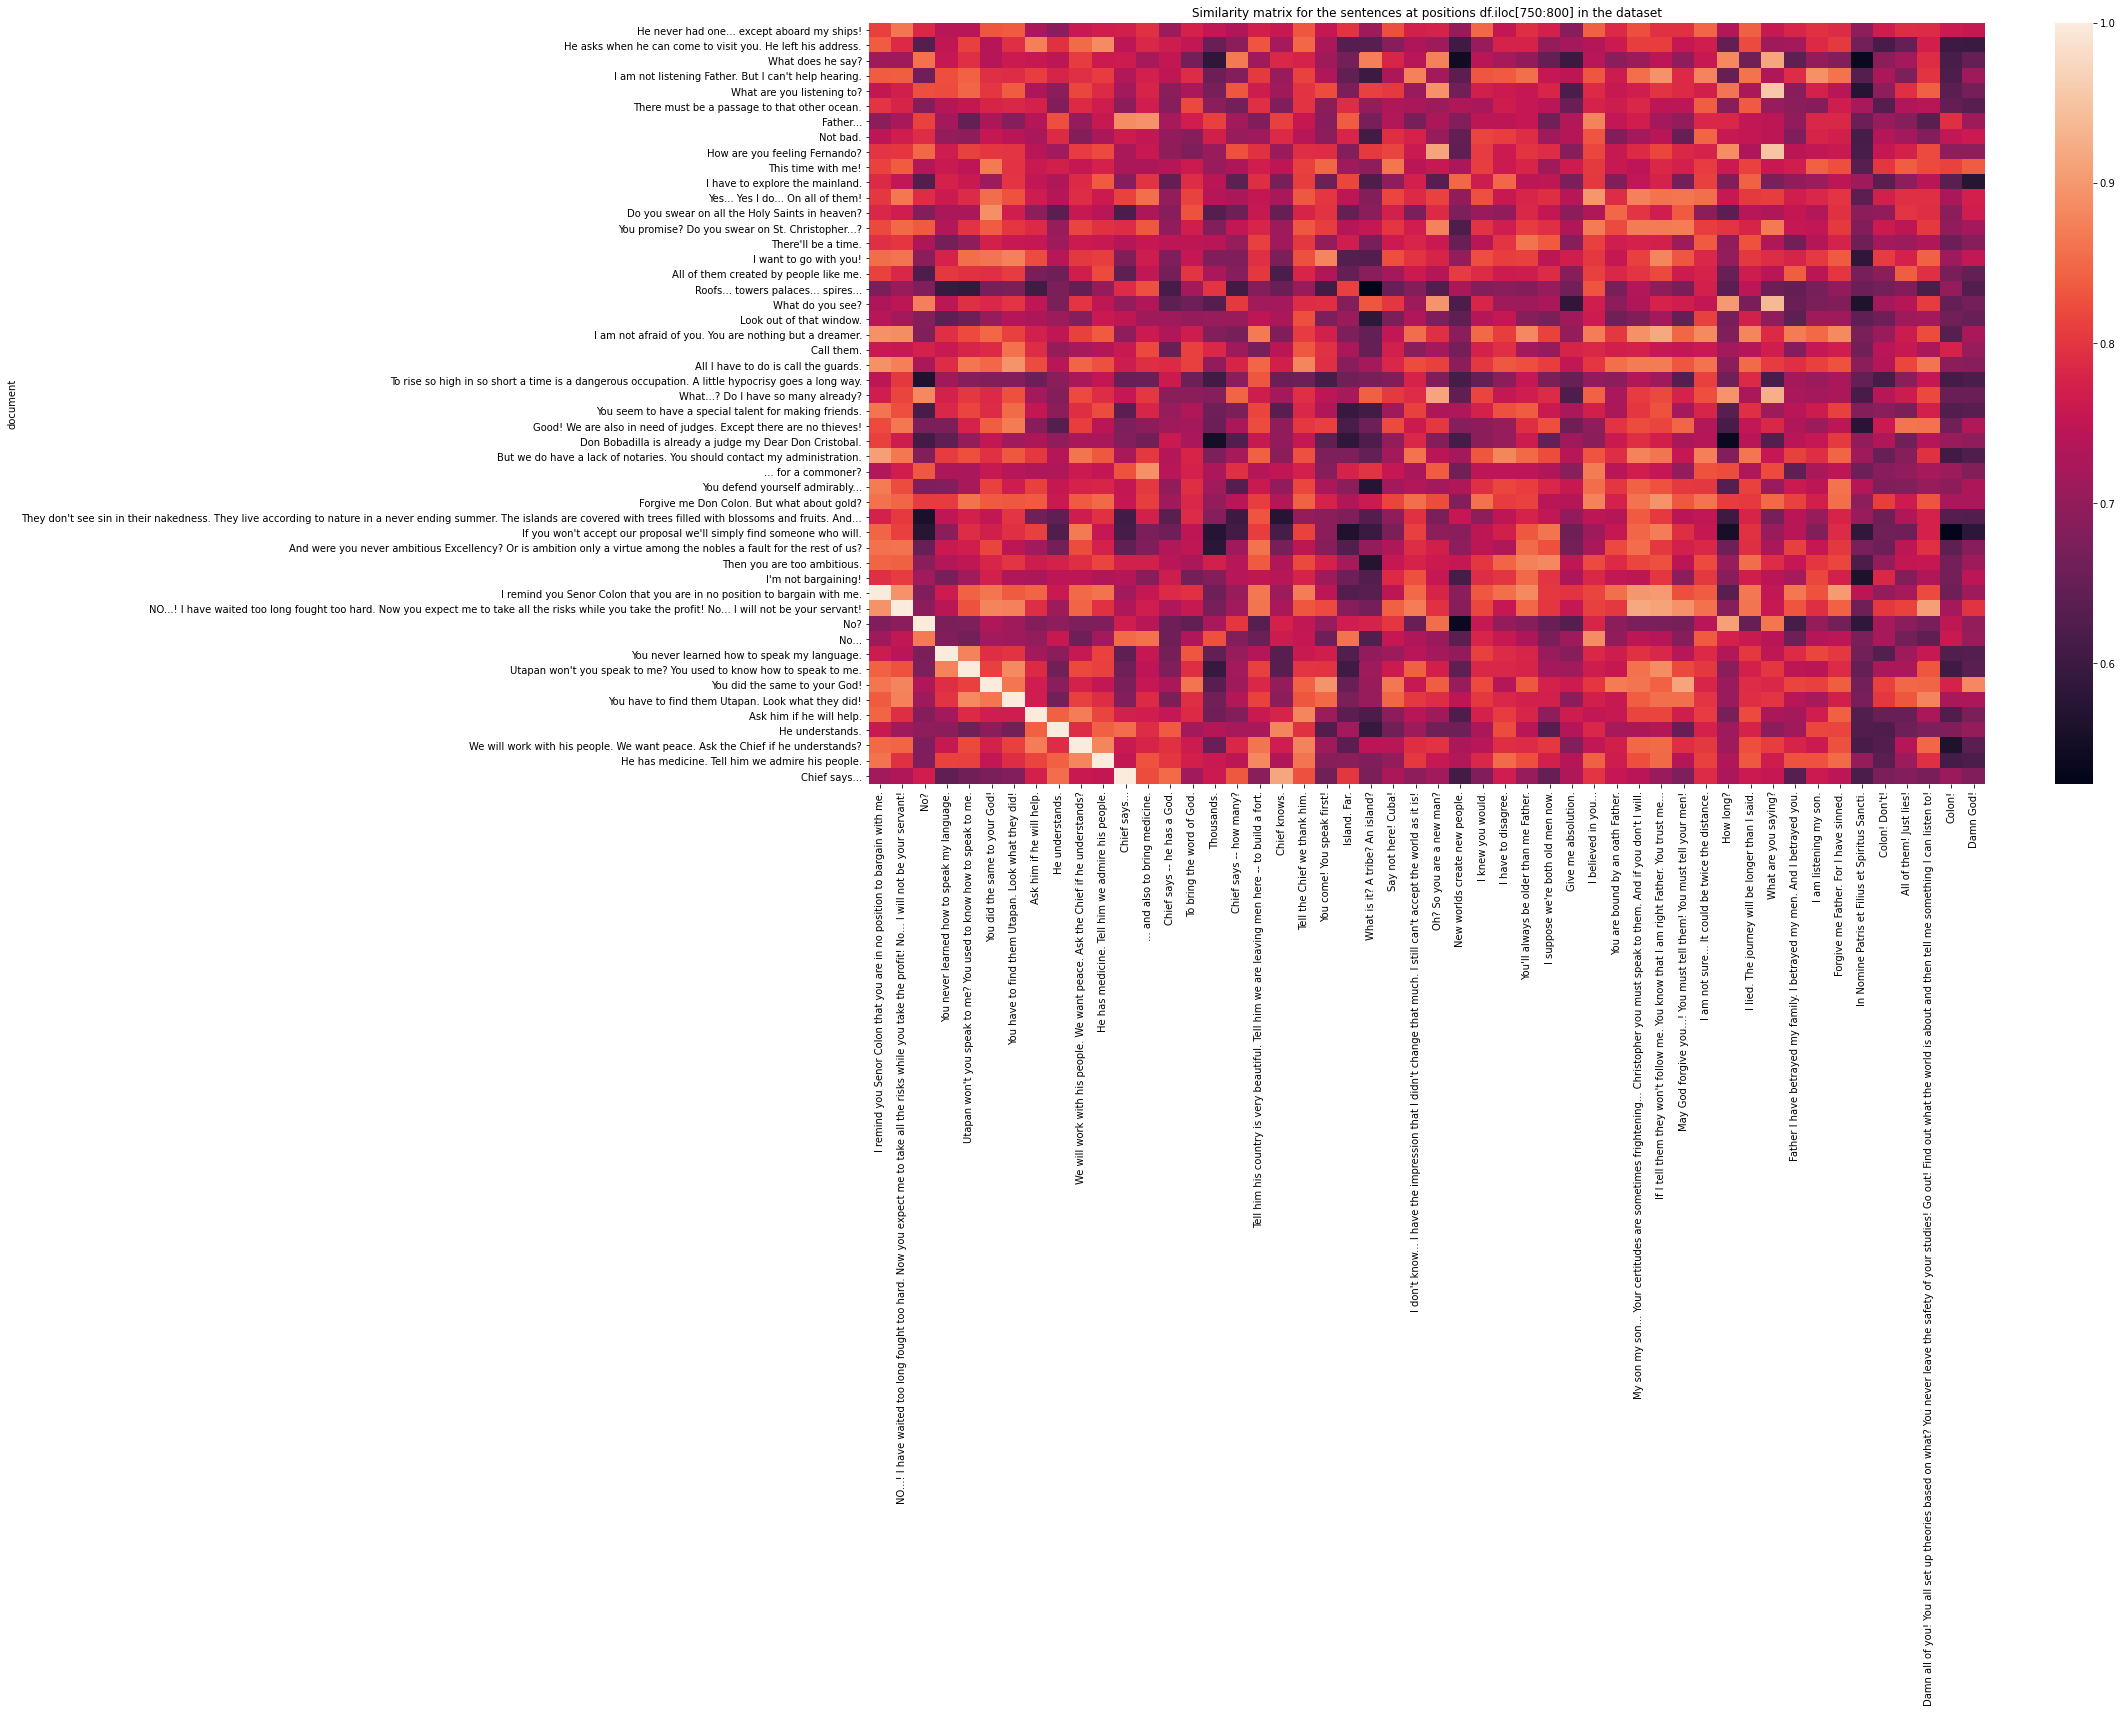

In [25]:
# def viz_sim_matrix_from_to(start_iloc,end_iloc, sim_df = sim_matrix_df):
#   # Plot heatmatrix for sentences at df.iloc[start:end]   
#   fig, ax = plt.subplots(figsize=(25,14)) 
#   sim_df.index = sim_df.document
#   sim_columns = list(sim_df.columns)
#   for b in non_sim_columns : sim_columns.remove(b)


#   ax = sns.heatmap(sim_df.iloc[start_iloc:end_iloc][sim_columns[start_iloc:end_iloc]]) # +2 because first 2 cols are not sim_scores

#   ax.axes.set_title(f"Similarity matrix for the sentences at positions df.iloc[{start_iloc}:{end_iloc}] in the dataset",)

# viz_sim_matrix_from_to(750,800)

(0.8, 1.0)

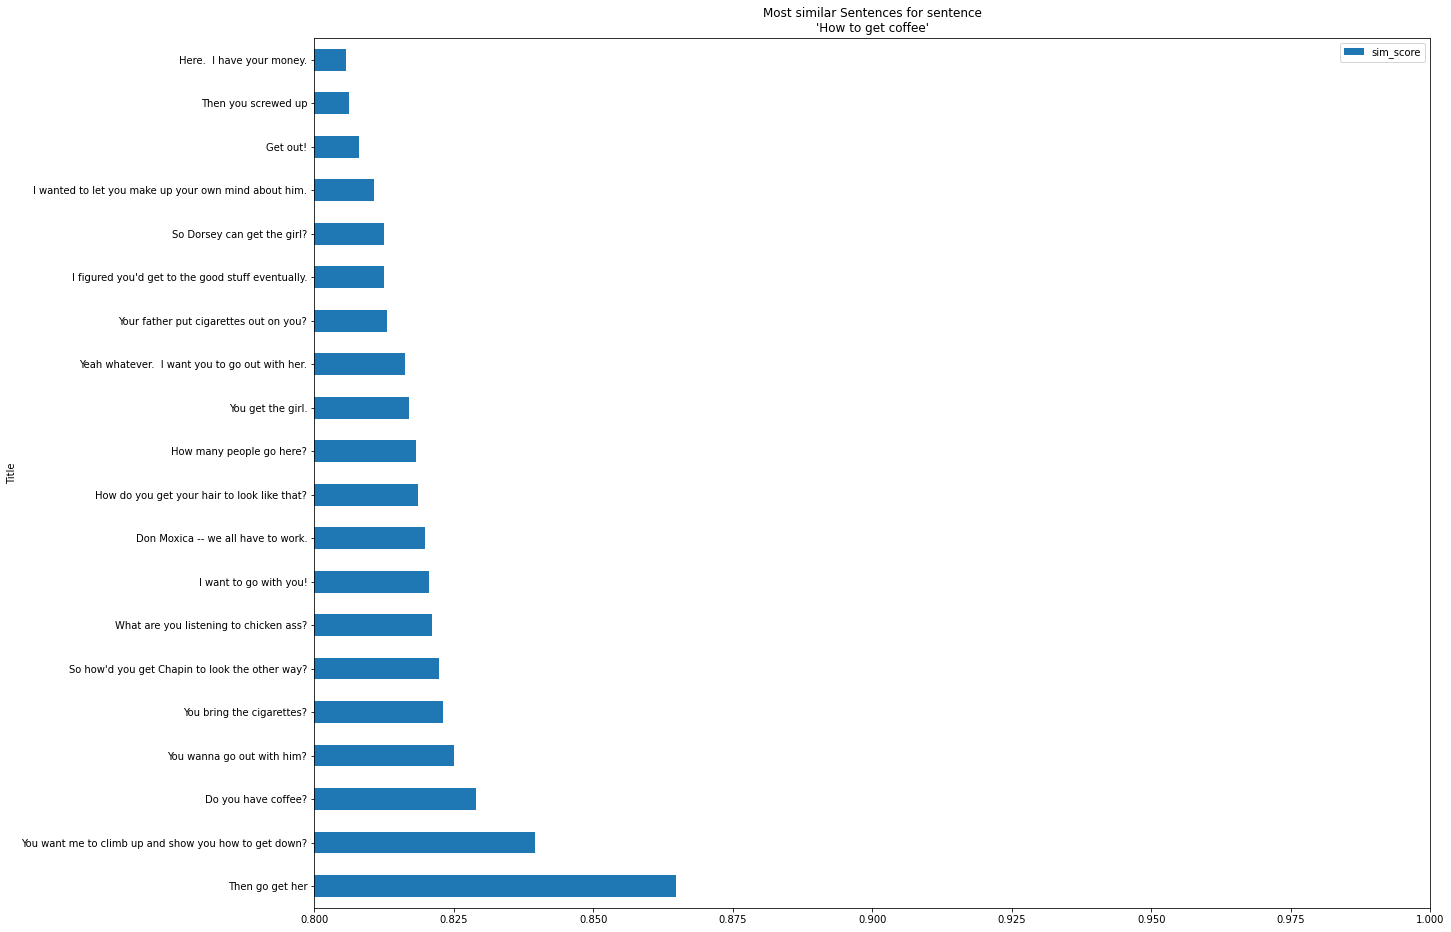

In [26]:
# def get_sim_df_for_string(predictions,e_col, string_to_embed,pipe=pipe):
#   # Creates a Dataframe which has a sim_score column which describes the similarity with the string_to_embed variable

#   # put predictions vectors in matrix
#   embed_mat = np.array([x for x in predictions[e_col]])

#   # embed string input string
#   embedding = pipe.predict(string_to_embed).iloc[0][e_col]

#   # Replicate embedding for input string 
#   m = np.array([embedding,]*len(df))
#   sim_mat = cosine_similarity(m,embed_mat)

#   #write sim score
#   df['sim_score'] = sim_mat[0]


#   return df


# question = 'How to get coffee' 
# sim_df = get_sim_df_for_string(predictions,e_col, question )
# ax = sim_df.sort_values('sim_score', ascending = False).iloc[:20][['sim_score','Title']].plot.barh(title = f"Most similar Sentences for sentence\n'{question}'", figsize=(20,16))
# ax.set_xlim(0.8, 1)

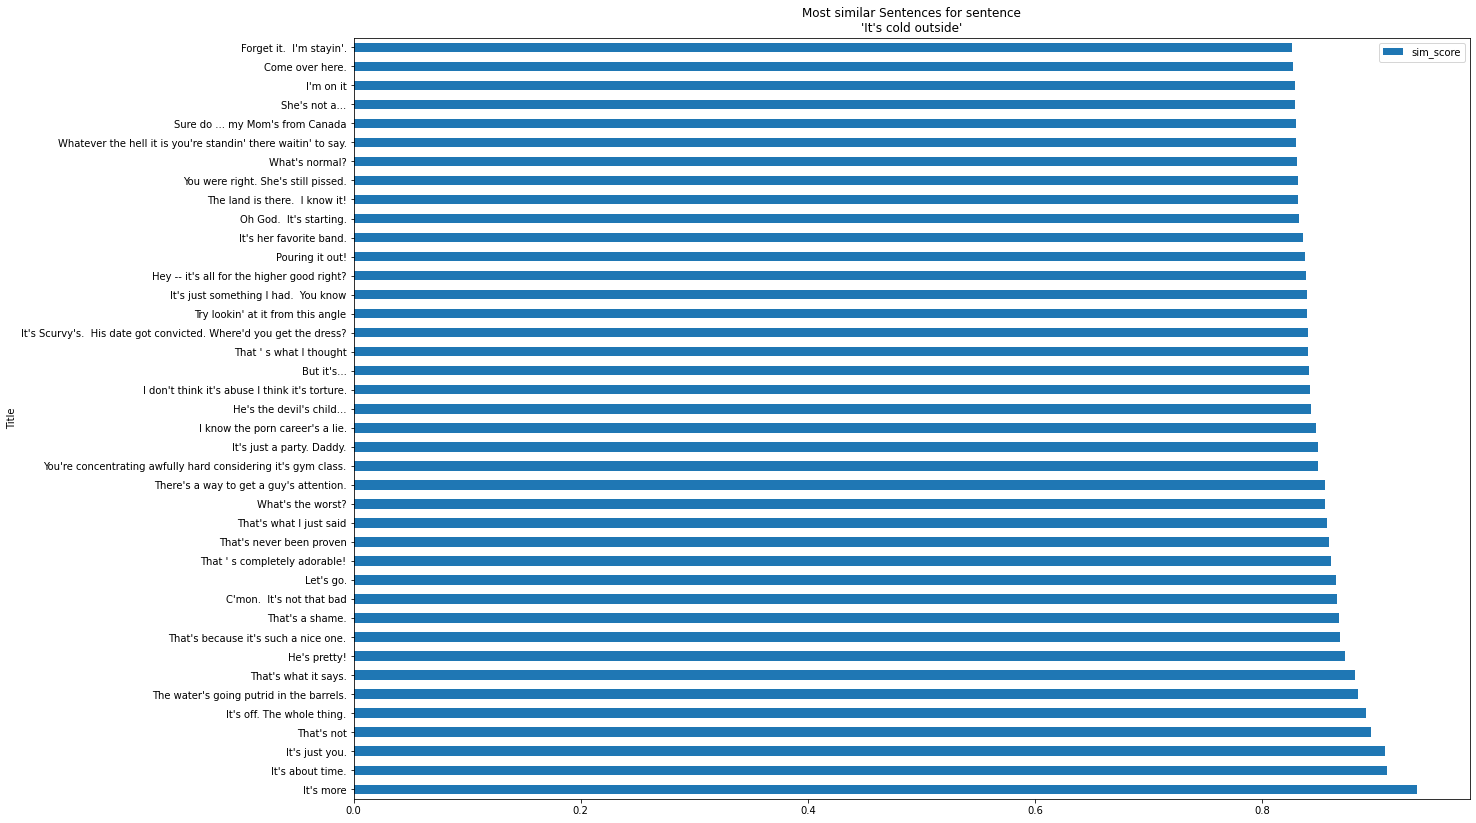

In [27]:
# def viz_sim_df_for_one_sent( question='How to install linux dualboot', e_col='embed_sentence_bert_embeddings', N = 40, sim_df_for_one_sent=sim_df_for_one_sent):
#   # Plots the N most similar sentences in our dataframe for sentence at position sent_iloc
#   sim_df = get_sim_df_for_string(predictions,e_col,question )
#   sim_df.index = sim_df.Title
#   sim_df.sort_values('sim_score', ascending = False).iloc[:N][['sim_score','Title']].plot.barh(title = f"Most similar Sentences for sentence\n'{question}'", figsize=(20,14))
#   ax.set_xlim(0.8, 1)

# question = 'It\'s cold outside'
# viz_sim_df_for_one_sent(question,e_col)

In [45]:
multi_pipe = nlu.load('use en.embed_sentence.electra embed_sentence.bert')
multi_embeddings = multi_pipe.predict(df.Title,output_level='document')
# multi_embeddings = multi_pipe.predict(df.Title)

multi_embeddings

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
sent_electra_small_uncased download started this may take some time.
Approximate size to download 48.7 MB
[OK!]
sent_small_bert_L2_128 download started this may take some time.
Approximate size to download 16.1 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


,sentence_embedding_electra,sentence_embedding_use,document,text,sentence_embedding_bert
0,"[0.4507451057434082, 0.5213155746459961, -0.11...","[-0.031140848994255066, 0.005686150398105383, ...",They do not!,They do not!,"[-1.64044189453125, 0.14650537073612213, -0.86..."
1,"[0.5401694178581238, 0.33893731236457825, -0.4...","[-0.012200254946947098, 0.012451746501028538, ...",They do to!,They do to!,"[-1.5560803413391113, 0.22445619106292725, -0...."
2,"[-0.26157549023628235, 0.6528839468955994, -0....","[0.006778175011277199, -0.05679572373628616, -...",I hope so.,I hope so.,"[-1.458977222442627, 0.5383047461509705, -0.94..."
3,"[0.32541021704673767, 0.21998605132102966, -0....","[-0.07075509428977966, 0.006026228424161673, -...",She okay?,She okay?,"[-1.8440120220184326, 0.07303400337696075, -1...."
4,"[0.1962766945362091, -0.08017592877149582, -0....","[0.01219316478818655, 0.01209795381873846, -0....",Let's go.,Let's go.,"[-1.6448785066604614, 0.5133222341537476, -0.9..."
...,...,...,...,...,...
10009,"[0.2409205436706543, 0.11901304125785828, -0.2...","[0.03296922519803047, 0.00924507062882185, 0.0...",Go and take rest at your seat,Go and take rest at your seat,"[-1.523411512374878, 1.2368760108947754, -1.10..."
10010,"[-0.04587539657950401, 0.5980038046836853, -0....","[-0.024093253538012505, 0.017610318958759308, ...",Help the captain,Help the captain,"[-1.890181541442871, 1.3786802291870117, -0.93..."
10011,"[0.16229398548603058, 0.19590699672698975, -0....","[-0.042860954999923706, -0.009653197601437569,...",Help the deputy take power from the captain,Help the deputy take power from the captain,"[-1.2715595960617065, 1.5081708431243896, -1.1..."
10012,"[0.45134761929512024, -0.17872466146945953, -0...","[-0.011525286361575127, 0.010793335735797882, ...",Get help to save everyone,Get help to save everyone,"[-1.7490770816802979, 0.6231147050857544, -1.3..."


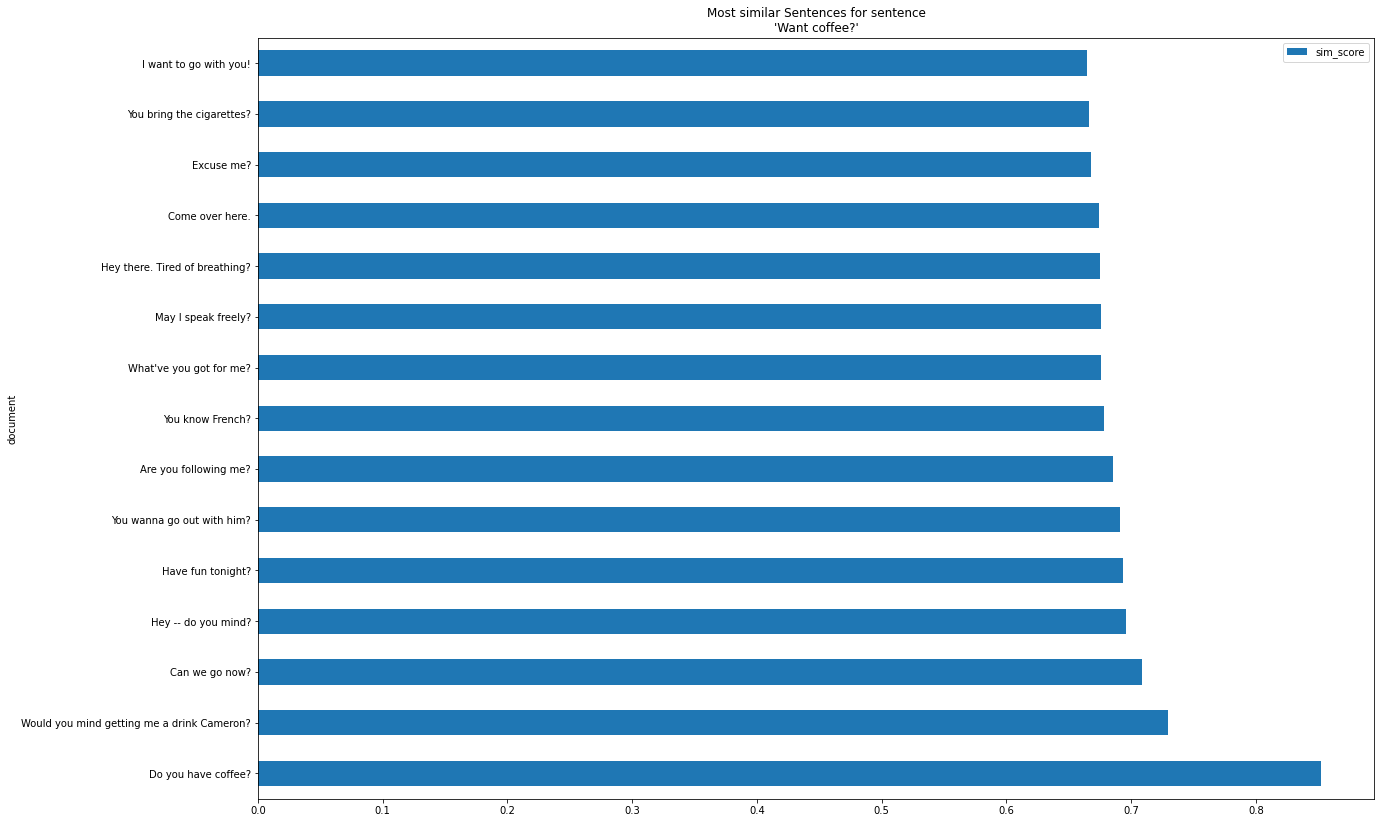

In [32]:
def get_sim_df_for_string_multi(predictions,embed_col_names, string_to_embed,pipe=multi_pipe):
  # Creates a Dataframe which has a sim_score column which describes the similarity with the string_to_embed variable
  # This accumulates the distances of all embeddings in embed_col_names and normalizes it by dividing by len(embed_col_names)
  #make empty simmilarity matrix which will store the aggregated simmilarities between different embeddings
  predictions.dropna(inplace=True)
  cum_sim = np.zeros((len(predictions),len(predictions)))

  # embed with all embedders currently loaded in pipeline
  embeddings = pipe.predict(string_to_embed).iloc[0]

  #loop over all embeddings columns and accumulate the pairwise distances with string_to_embed into cum_sim
  for e_col in embed_col_names:
    # get the current embedding for input string
    embedding = embeddings[e_col]  
    # stack embedding vector for input string
    m = np.array([embedding,]*len(predictions)) 
    # put df vectors in np matrix
    embed_mat = np.array([x for x in predictions[e_col]]) 
    # calculate new similarities
    sim_mat = cosine_similarity(m,embed_mat) 
  # accumulate new simmilarities in cum_sum
    cum_sim += sim_mat  

  predictions['sim_score'] = cum_sim[0]/len(embed_col_names) 
  return predictions

question = 'I want to get something Taiwanese to eat at Din Tai Fung'
electra_col = 'sentence_embedding_electra'
use_col = 'sentence_embedding_use'
bert_col = 'sentence_embedding_bert'
col_names = [electra_col,use_col, bert_col]

sim_df = get_sim_df_for_string_multi(multi_embeddings,col_names, question )
sim_df.index = sim_df.document
sim_df.sort_values('sim_score', ascending = False).iloc[:15][['sim_score','document']].plot.barh(title = f"Most similar Sentences for sentence\n'{question}'", figsize=(20,14))

In [62]:
def viz_sim_df_for_one_sent_multi_embed( question='How to install linux dualboot', e_cols=col_names, N = 40, multi_embeddings=multi_embeddings):
  # Plots the N most similar sentences in our dataframe for sentence at position sent_iloc
  sim_df = get_sim_df_for_string_multi(multi_embeddings,col_names, question )
  sim_df.index = sim_df.document
  return sim_df.sort_values('sim_score', ascending = False)
  # sim_df.sort_values('sim_score', ascending = False).iloc[:N][['sim_score','document']].plot.barh(title = f"Most similar Sentences for sentence\n'{question}'",figsize=(20,14))

  ax.set_xlim(0.8, 1)

all_hints = []
i = 0
for i in range(len(hints)):
  print(i)
  col_names = [electra_col,use_col, bert_col]
  ordered_hints = viz_sim_df_for_one_sent_multi_embed(hints[i], col_names)
  
  ordered_hints['id'] = range(i*100, i*100+len(ordered_hints))
  ordered_hints = ordered_hints.iloc[0:100, :][['id','document','sim_score']]
  ordered_hints
  all_hints = all_hints + ordered_hints.values.tolist()

print(all_hints)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
[[0, 'I want to get something Taiwanese to eat at Din Tai Fung', 1.0000000000000002], [1, "What shit? Now where do we have reservations at? I mean I'm not really hungry but I would like to have reservations somewhere.", 0.715824850752457], [2, "Helen while you're downtown you might stop in and make reservations for the bridal suite on the Berengaria sailing next week.", 0.7087080387980178], [3, "Yeah I'm hungry too. I know of a place. Let's go eat.", 0.695819667113405], [4, 'Yesss but I was thinking I could come by and then take Zee out. Some place near. With other folk. Near. Here. But out.', 0.6859349547475073], [5, "I don't understand the allure of dehydrated food. Is this something I should be hip to?", 0.6824656601141683], [6, "I'll buy ya the best dinner in San Francisco...how'd that be? Then we'll go dancin' okay?", 0.6759946049203543], [7, 'I want to go back to Vienna.', 0.6712328991983698], [8, 'Dinner at the River Cafe. Au Bar afterwards maybe.

In [66]:
df = pd.DataFrame(all_hints,columns=['id','hint','sim_score'])
df

# from google.colab import drive
# drive.mount('drive')

df.to_csv('hints.csv')
!cp hints.csv "drive/My Drive/"